<a href="https://colab.research.google.com/github/Deba951/Hyperspectral_Image_Analysis_Learning/blob/main/Dimensionality_Reduction_on_HSI_using_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dimensionality Reduction on HSI

## Import Libraries

In [1]:
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.axes_style('whitegrid');

## Download HSI Data

In [2]:
!wget http://www.ehu.eus/ccwintco/uploads/e/ee/PaviaU.mat http://www.ehu.eus/ccwintco/uploads/5/50/PaviaU_gt.mat

--2023-09-13 19:21:17--  http://www.ehu.eus/ccwintco/uploads/e/ee/PaviaU.mat
Resolving www.ehu.eus (www.ehu.eus)... 158.227.0.65, 2001:720:1410::65
Connecting to www.ehu.eus (www.ehu.eus)|158.227.0.65|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.ehu.eus/ccwintco/uploads/e/ee/PaviaU.mat [following]
--2023-09-13 19:21:18--  https://www.ehu.eus/ccwintco/uploads/e/ee/PaviaU.mat
Connecting to www.ehu.eus (www.ehu.eus)|158.227.0.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34806917 (33M)
Saving to: ‘PaviaU.mat’

PaviaU.mat          100%[===================>]  33.19M   814KB/s    in 65s     

2023-09-13 19:22:23 (522 KB/s) - ‘PaviaU.mat’ saved [34806917/34806917]

URL transformed to HTTPS due to an HSTS policy
--2023-09-13 19:22:23--  https://www.ehu.eus/ccwintco/uploads/5/50/PaviaU_gt.mat
Connecting to www.ehu.eus (www.ehu.eus)|158.227.0.65|:443... connected.
HTTP request sent, awaiting response... 200 O

In [3]:
!ls

PaviaU_gt.mat  PaviaU.mat  sample_data


## Read the Data

In [4]:
from scipy.io import loadmat

def read_HSI():
  X = loadmat('PaviaU.mat')['paviaU']
  y = loadmat('PaviaU_gt.mat')['paviaU_gt']
  print(f"X shape: {X.shape}\ny shape: {y.shape}")
  return X, y

X, y = read_HSI()

X shape: (610, 340, 103)
y shape: (610, 340)


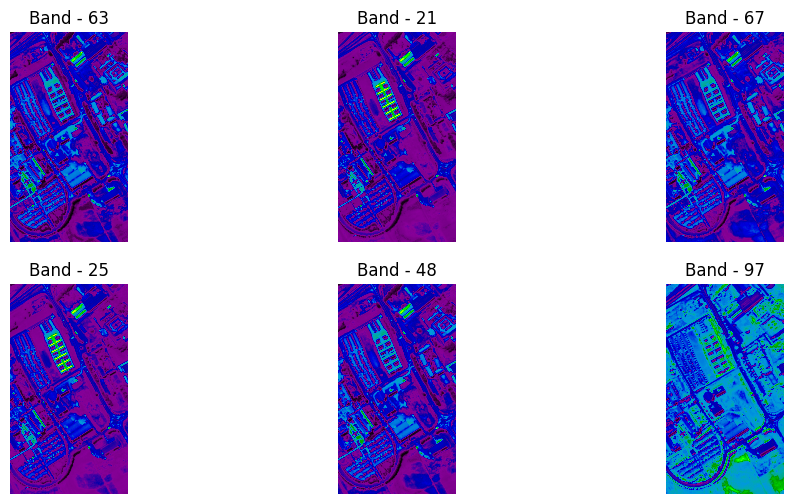

In [5]:
fig = plt.figure(figsize = (12, 6))

for i in range(1, 1+6):
    fig.add_subplot(2,3, i)
    q = np.random.randint(X.shape[2])
    plt.imshow(X[:,:,q], cmap='nipy_spectral')
    plt.axis('off')
    plt.title(f'Band - {q}')

In [19]:
# # Visualizing the Ground truth of the HSI
# cls = px.imshow(y, color_continuous_scale='inferno',)

# cls.update_layout(title = 'Gound Truth', coloraxis_showscale=True)
# cls.update_xaxes(showticklabels=False)
# cls.update_yaxes(showticklabels=False)
# cls.show()
# # py.plot(cls, filename = 'ground_truth', auto_open=True)

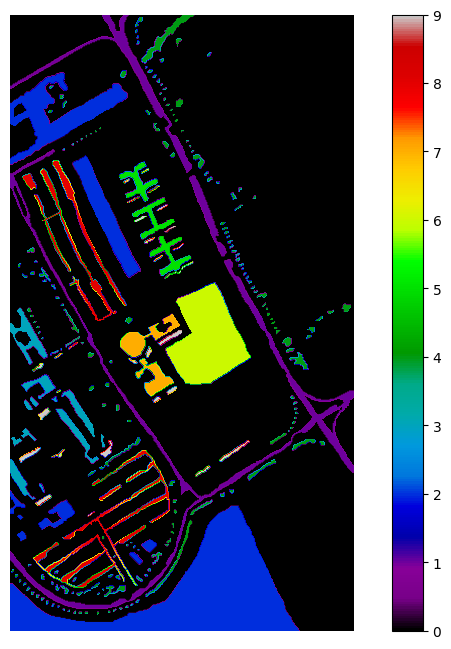

In [9]:
plt.figure(figsize=(10, 8))
plt.imshow(y, cmap='nipy_spectral')
plt.colorbar()
plt.axis('off')
plt.show()

## Convert the dataset into csv

In [10]:
import pandas as pd
import numpy as np

def extract_pixels(X, y):
  q = X.reshape(-1, X.shape[2])
  df = pd.DataFrame(data = q)
  df = pd.concat([df, pd.DataFrame(data = y.ravel())], axis=1)
  df.columns= [f'band{i}' for i in range(1, 1+X.shape[2])]+['class']
  df.to_csv('Dataset.csv')
  return df

df = extract_pixels(X, y)

In [11]:
df.head()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band95,band96,band97,band98,band99,band100,band101,band102,band103,class
0,647,499,464,371,291,319,365,322,296,305,...,3416,3335,3256,3226,3205,3210,3221,3238,3250,0
1,604,546,527,455,378,377,336,314,324,329,...,2583,2538,2509,2511,2501,2468,2442,2464,2528,0
2,621,746,556,360,285,300,274,276,332,319,...,2288,2242,2193,2202,2225,2266,2308,2345,2361,0
3,637,592,482,556,508,284,178,198,193,224,...,2675,2609,2541,2551,2571,2569,2573,2620,2644,0
4,625,560,480,360,377,341,264,208,231,266,...,2392,2344,2289,2328,2415,2424,2386,2431,2456,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207400 entries, 0 to 207399
Columns: 104 entries, band1 to class
dtypes: uint16(103), uint8(1)
memory usage: 40.9 MB


In [13]:
df.iloc[:, :-1].describe()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band94,band95,band96,band97,band98,band99,band100,band101,band102,band103
count,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,...,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000,207400.000000
mean,925.324995,850.237584,800.363558,809.889783,830.085950,834.162700,833.530641,825.932729,823.827637,830.388689,...,2262.503269,2266.693293,2257.763443,2249.329595,2246.216779,2238.254364,2231.822647,2224.744884,2236.901707,2253.451692
std,444.427499,468.464292,493.590158,527.235307,555.419089,574.543548,592.474167,605.782075,619.492506,636.532214,...,863.285910,863.351557,857.286520,845.571285,833.001117,826.922155,827.403828,827.257369,834.092348,844.165146
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,145.000000,146.000000,150.000000,140.000000,0.000000,134.000000,0.000000
25%,649.000000,555.000000,483.000000,473.000000,480.000000,474.000000,461.000000,444.000000,433.000000,430.000000,...,1696.000000,1699.000000,1693.000000,1690.000000,1696.000000,1692.000000,1685.000000,1675.000000,1682.000000,1692.000000
50%,857.000000,762.000000,694.000000,690.000000,693.000000,681.000000,671.000000,661.000000,657.000000,658.000000,...,2246.000000,2252.000000,2244.000000,2236.000000,2238.000000,2235.000000,2231.000000,2226.000000,2244.000000,2261.000000
75%,1111.000000,1046.000000,1015.000000,1036.000000,1058.000000,1066.000000,1068.000000,1064.000000,1066.000000,1080.000000,...,2724.000000,2730.000000,2721.000000,2711.000000,2701.000000,2688.000000,2683.000000,2677.000000,2692.000000,2715.000000
max,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000


## Principal Component Analysis(PCA)

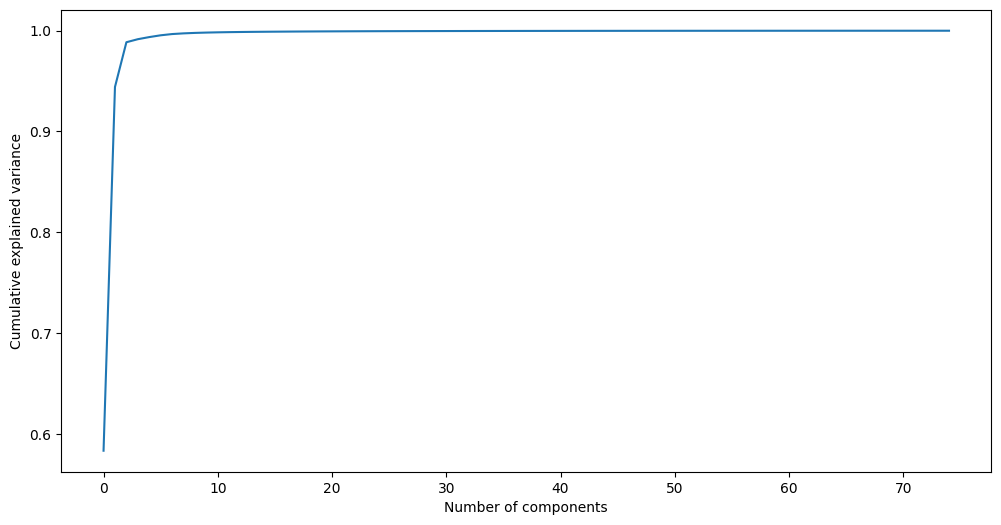

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 75)

principalComponents = pca.fit_transform(df.iloc[:, :-1].values)

ev=pca.explained_variance_ratio_

plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(ev))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')


plt.show()

In [15]:
pca = PCA(n_components = 8)
dt = pca.fit_transform(df.iloc[:, :-1].values)
q = pd.concat([pd.DataFrame(data = dt), pd.DataFrame(data = y.ravel())], axis = 1)
q.columns = [f'PC-{i}' for i in range(1,9)]+['class']

In [16]:
q.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,class
0,-5150.190044,6795.052770,1532.351461,410.030134,-259.856157,-832.898970,293.239776,278.385207,0
1,-6082.245760,3158.592195,1463.194744,154.617093,-438.871878,-496.202149,362.925839,187.355432,0
2,-7214.505405,1158.875812,1400.817899,410.044063,38.052916,-560.804196,-140.004203,8.847606,0
3,-6566.279360,3398.894763,1126.024772,496.775042,-302.415250,-409.493899,218.391586,-2.957279,0
4,-6496.967970,2154.797771,1035.954575,27.247705,-194.891403,-189.044607,-71.142484,-97.987806,0


## Display the bands after PCA

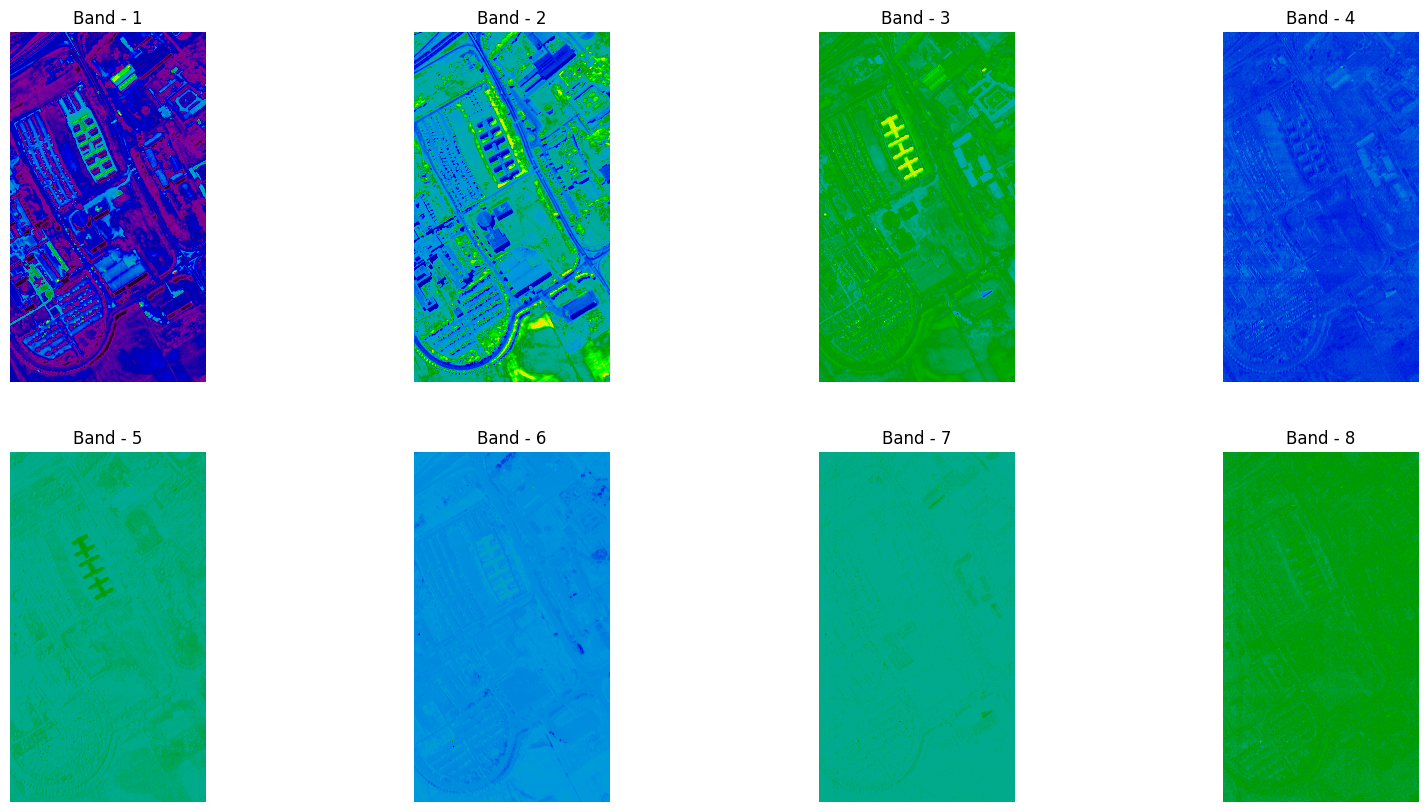

In [17]:
fig = plt.figure(figsize = (20, 10))

for i in range(1, 1+8):
    fig.add_subplot(2,4, i)
    plt.imshow(q.loc[:, f'PC-{i}'].values.reshape(610, 340), cmap='nipy_spectral')
    plt.axis('off')
    plt.title(f'Band - {i}')

In [18]:
# saving to .csv
q.to_csv('paviaU_8_PCA.csv', index=False)